In [7]:
# Set project directory as sys path
import os
import sys
parent_dir = os.getcwd()
while not os.path.isfile(os.path.join(parent_dir, 'config.py')):
    parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)

# Library Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Local Imports
from app.adapters.storage import get_storage

# Notebook settings
sns.set_style("whitegrid")

In [8]:
df = get_storage().read_file('data/transformed/point_counts.csv')

2022-04-10 11:47:07 [MAIN] [INFO] [CONNECT] Connecting to local directory...
2022-04-10 11:47:07 [MAIN] [INFO] [READ] data/transformed/point_counts.csv


In [9]:
df.head(1)

,observer_id,observer,site_id,site,sampling_period,date,start_time,point,minute,species_code,species,distance,how,visual,sex,migrating,cluster_size,cluster_code,notes
0,CKD,Colin Dobson,CC,Cow Creek Ranch,Spring 2021,2021-04-19,24060.0,1.0,1.0,HOSP,House Sparrow,75.0,Visual,True,Unknown,False,6.0,NaN,NaN


In [20]:
# Filter out "No Bird" observations
df = df[df['species'] != 'No Birds']

#### Spring 2021

In [29]:
# Filter out other seasons
spr_2021 = df[df['sampling_period'] == 'Spring 2021']

<AxesSubplot:xlabel='count', ylabel='species'>

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Species Counts, Spring 2021')]

Text(157, 0.25, '154')

Text(91, 1.25, '88')

Text(85, 2.25, '82')

Text(63, 3.25, '60')

Text(57, 4.25, '54')

Text(44, 5.25, '41')

Text(43, 6.25, '40')

Text(37, 7.25, '34')

Text(27, 8.25, '24')

Text(26, 9.25, '23')

Text(26, 10.25, '23')

Text(23, 11.25, '20')

Text(21, 12.25, '18')

Text(17, 13.25, '14')

Text(17, 14.25, '14')

Text(16, 15.25, '13')

Text(16, 16.25, '13')

Text(16, 17.25, '13')

Text(15, 18.25, '12')

Text(15, 19.25, '12')

Text(15, 20.25, '12')

Text(14, 21.25, '11')

Text(14, 22.25, '11')

Text(12, 23.25, '9')

Text(12, 24.25, '9')

Text(12, 25.25, '9')

Text(11, 26.25, '8')

Text(10, 27.25, '7')

Text(9, 28.25, '6')

Text(9, 29.25, '6')

Text(9, 30.25, '6')

Text(9, 31.25, '6')

Text(8, 32.25, '5')

Text(8, 33.25, '5')

Text(8, 34.25, '5')

Text(7, 35.25, '4')

Text(6, 36.25, '3')

Text(6, 37.25, '3')

Text(5, 38.25, '2')

Text(5, 39.25, '2')

Text(5, 40.25, '2')

Text(5, 41.25, '2')

Text(5, 42.25, '2')

Text(5, 43.25, '2')

Text(5, 44.25, '2')

Text(5, 45.25, '2')

Text(5, 46.25, '2')

Text(5, 47.25, '2')

Text(5, 48.25, '2')

Text(5, 49.25, '2')

Text(5, 50.25, '2')

Text(5, 51.25, '2')

Text(4, 52.25, '1')

Text(4, 53.25, '1')

Text(4, 54.25, '1')

Text(4, 55.25, '1')

Text(4, 56.25, '1')

Text(4, 57.25, '1')

Text(4, 58.25, '1')

Text(4, 59.25, '1')

Text(4, 60.25, '1')

Text(4, 61.25, '1')

Text(4, 62.25, '1')

Text(4, 63.25, '1')

Text(4, 64.25, '1')

Text(4, 65.25, '1')

Text(4, 66.25, '1')

Text(4, 67.25, '1')

Text(4, 68.25, '1')

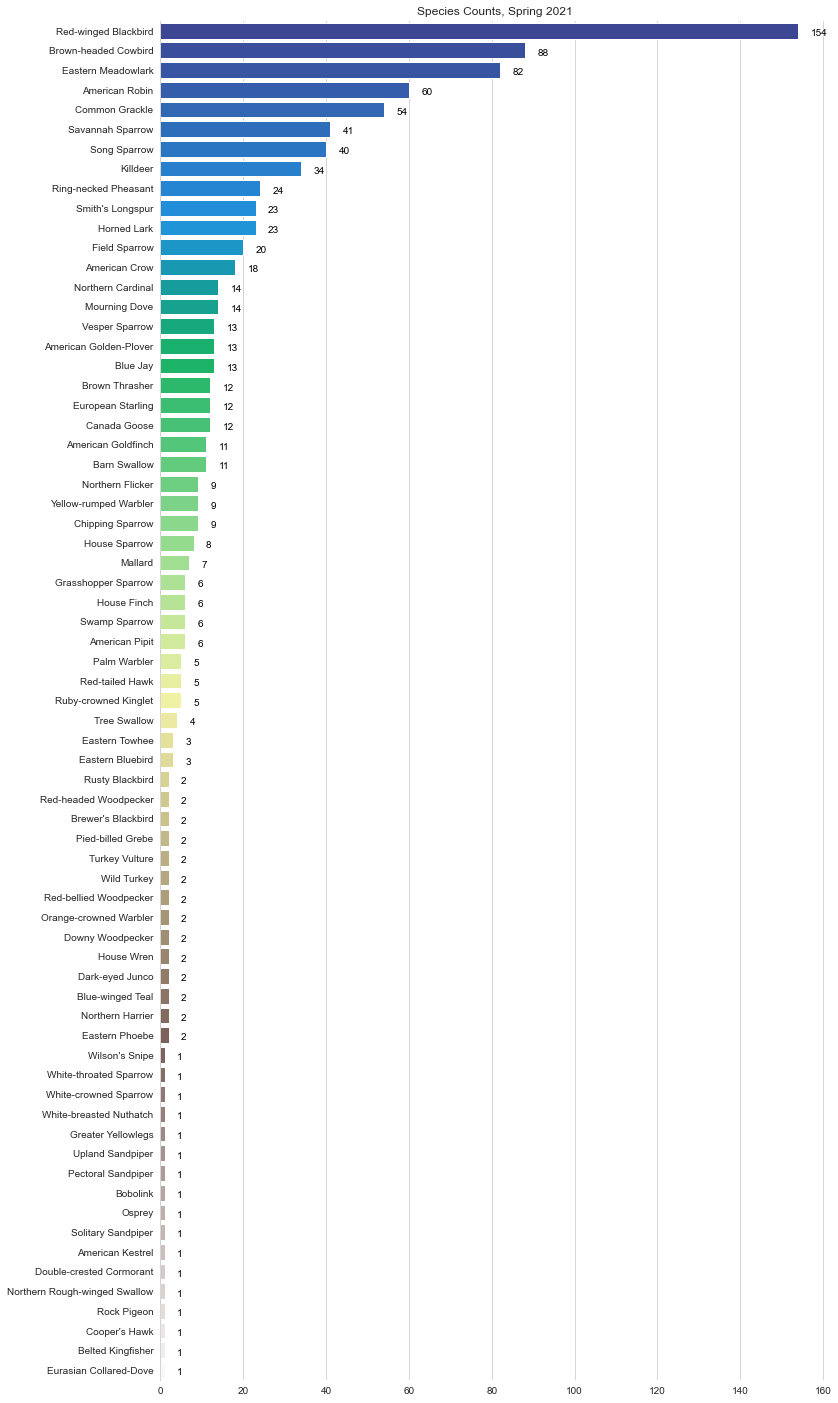

In [34]:
# Most common species, by site
counts = spr_2021.groupby(['species'])['species'].count() \
    .reset_index(name='count') \
    .sort_values(by=['count'], ascending=[False])

# Plot
fig, ax = plt.subplots(figsize=[12, 25])
sns.barplot(x='count', y='species', data=counts, palette='terrain')
ax.set(xlabel='', ylabel='', title='Species Counts, Spring 2021')
for i, v in enumerate(counts['count']):
    ax.text(v + 3, i + 0.25, str(v), color='black')
sns.despine(bottom=True)